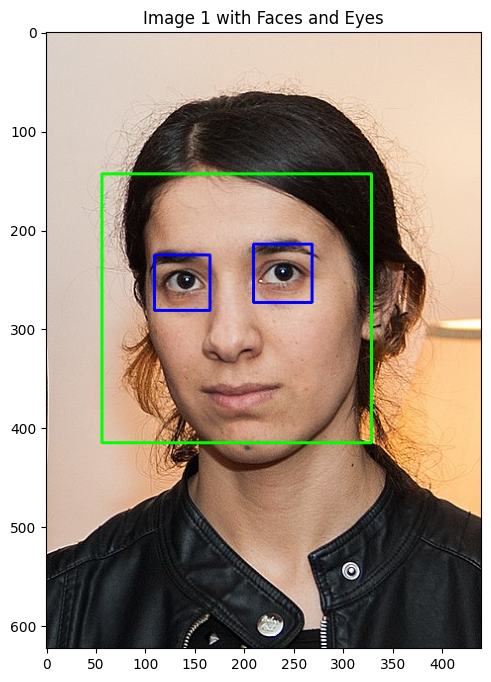

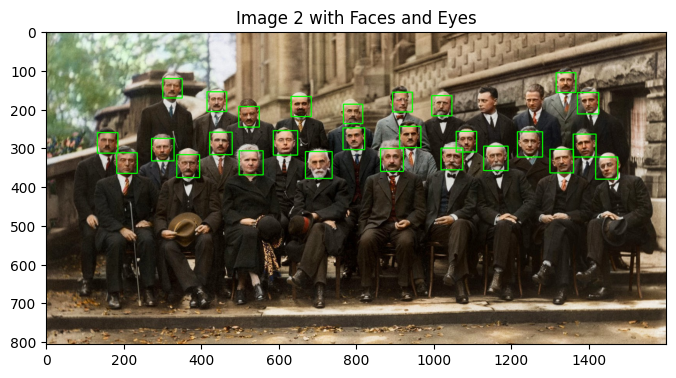

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the cascade files
face_cascade = cv2.CascadeClassifier('C:/Users/User/Desktop/Comp Vision/Cascade_files/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/User/Desktop/Comp Vision/Cascade_files/haarcascade_eye_tree_eyeglasses.xml')

# Load the paths to the 2 images
image_paths = [
    'C:/Users/User/Desktop/Comp Vision/Data/Nadia_Murad.jpg',
    'C:/Users/User/Desktop/Comp Vision/Data/solvay_conference.jpg'
]

# Function to detect and draw rectangles around faces and eyes
def detect_and_draw_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Detect eyes in the face region
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)

    return img

# Display each image with detected faces and eyes separately in a Jupyter notebook
for i, image_path in enumerate(image_paths, start=1):
    img = cv2.imread(image_path)
    img_with_features = detect_and_draw_features(img)

    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img_with_features, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {i} with Faces and Eyes')
    plt.show()
